0.2037
10000
2037


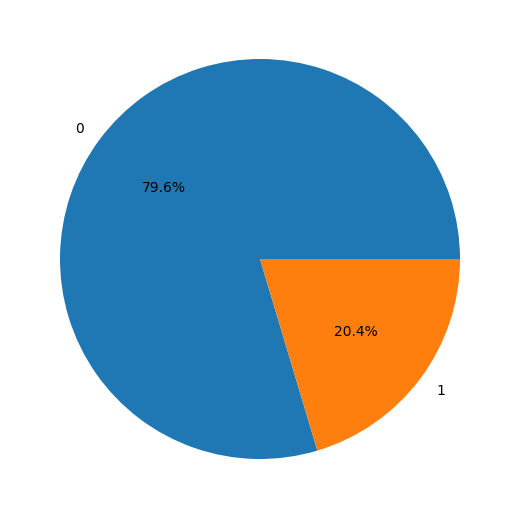

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
churn_data = churn_data.copy()
churn_data.head()
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
print(churn_data['Exited'].mean())
print(churn_data['Exited'].count())
print(churn_data['Exited'].sum())

clients = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients,
    labels=clients.index,
    autopct='%.1f%%',
    explode =None
);


Для решения задачи 9.1 

Строим круговую диаграмму, показывающуюю соотношение клиентов. Видим что примерно одна пятая всех клиентов покинула банк.

Для решения задачи 9.2. Строим гистограмму распределения баланса.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


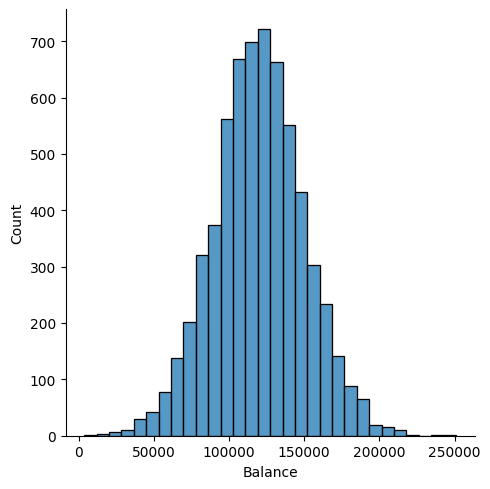

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
churn_data.head()
mask = churn_data['Balance']>2500
churn_data1 = churn_data[mask]
sns.displot(data = churn_data1, x = churn_data1['Balance'], kind = 'hist', bins = 30);
churn_data1.head()

График распределения баланса вкладов более 2500 долларов показывает распределение близкое к нормальному.
Большинство клиентов имеет от 50000 до 200000 тысяч долларов. Вкладчиками этого банка являются довольно состоятельные
клиенты. Очевидно, что они будут предъявлять повышенные требования к качеству услуг.

Задача 9.3
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


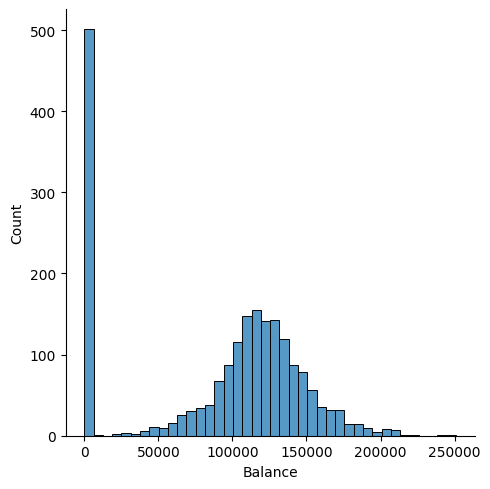

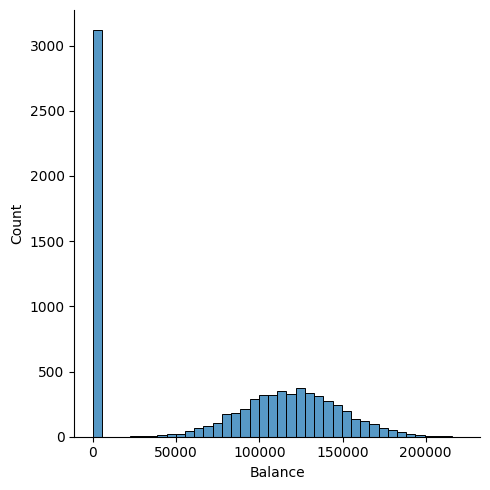

In [38]:
mask1 = churn_data['Exited']==1
churn_data2 = churn_data[mask1]
sns.displot(data = churn_data2, x = churn_data2['Balance'], kind = 'hist', bins = 40);
mask2 = churn_data['Exited']==0
churn_data3 = churn_data[mask2]
sns.displot(data = churn_data3, x = churn_data3['Balance'], kind = 'hist', bins = 40);
churn_data3.head()


Распределение баланса ушедших и оставшихся клиентов не похожи. По распределению баланса определить причину ухода клиентов не получается.

Задача 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

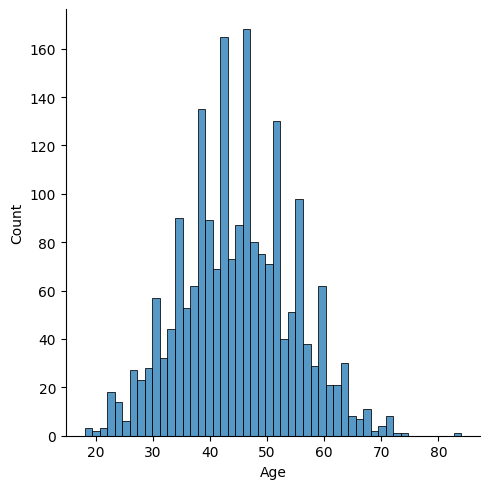

In [39]:
sns.displot(data = churn_data2, x = churn_data2['Age'], kind = 'hist', bins = 50);

Банку следует обратить внимание на клиентов из возрастной группы от 40 до 50 лет.

Задача 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

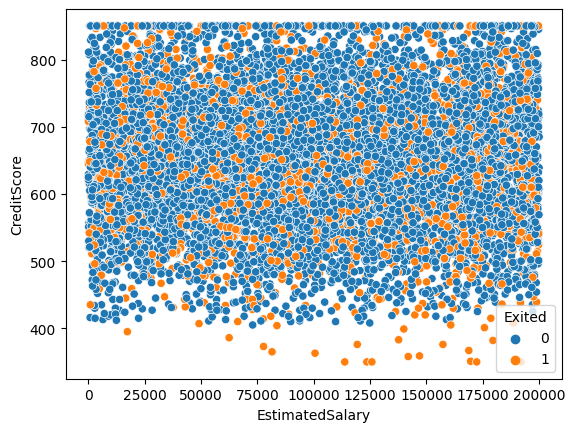

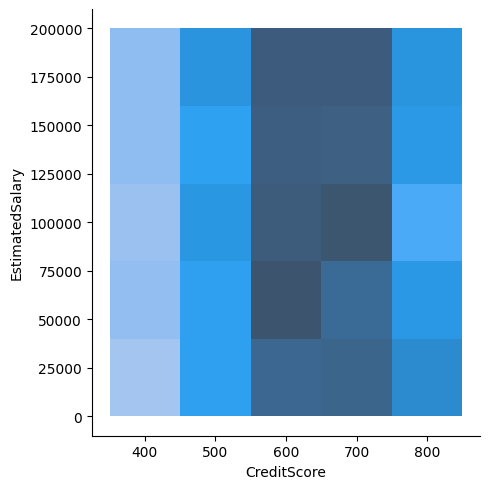

In [40]:
sns.scatterplot(data = churn_data, x = 'EstimatedSalary', y = 'CreditScore', hue = 'Exited')
sns.displot(data = churn_data2, x = 'CreditScore', y = 'EstimatedSalary', kind = 'hist', bins = 5)



Явной зависимости кредитного рейтинга от зарплаты не наблюдается. 

Задача 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

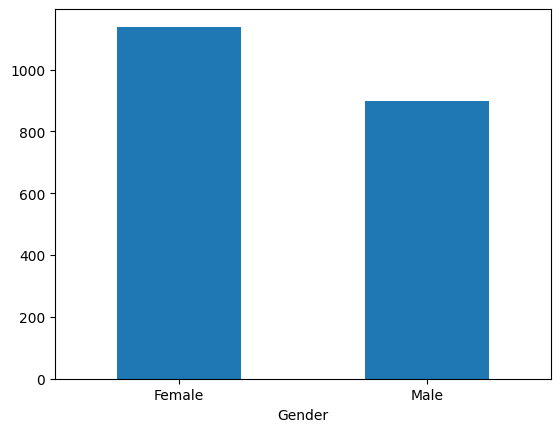

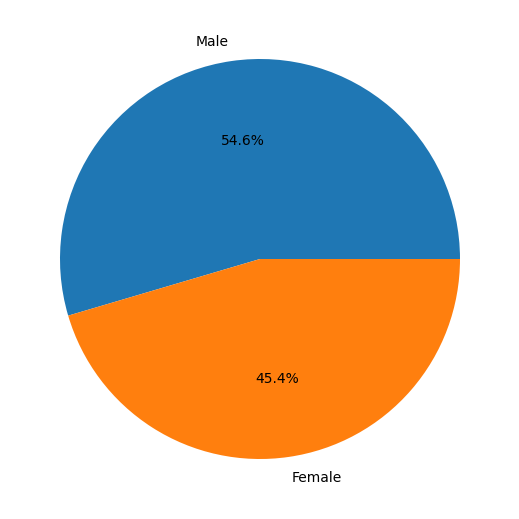

In [41]:
churn_data2['Gender'].describe()
churn_data2.Gender.value_counts().plot.bar(rot = 0)
clients = churn_data['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients,
    labels=clients.index,
    autopct='%.1f%%',
    explode =None
);

На графике представлено количество ушедших клиентов. Больше ушедших женщин. Хотя среди клиентов их меньше.
На это банку следует обратить внимание.

Задача 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Exited              0       1
NumOfProducts                
1              3675.0  1409.0
2              4242.0   348.0
3                46.0   220.0
4                 NaN    60.0


Text(0, 0.5, 'Количество клиентов')

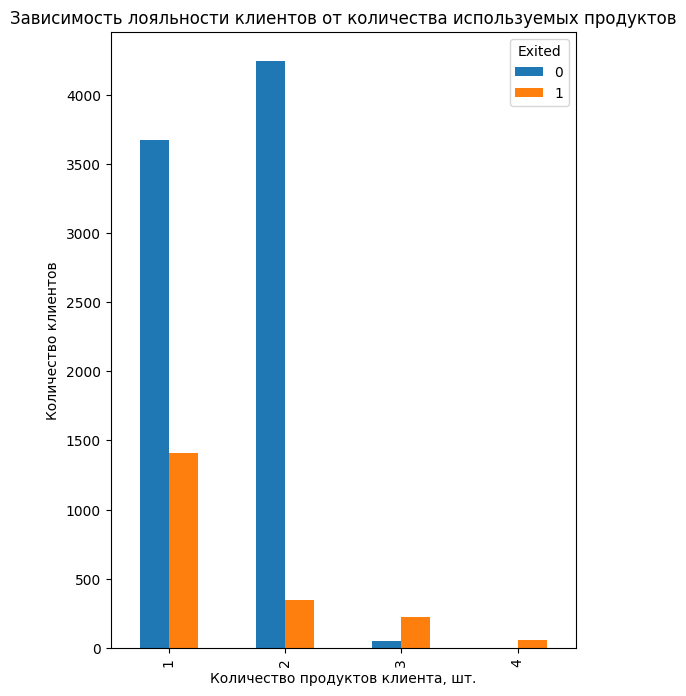

In [42]:
pivot_1 = churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
print(pivot_1)
pivot_1 = pivot_1.fillna(0) 
fig_7, axes_7 = plt.subplots(figsize=(6,8))
pivot_1.plot(
    kind='bar',
    ax=axes_7
)
axes_7.set_title('Зависимость лояльности клиентов от количества используемых продуктов')
axes_7.set_xlabel('Количество продуктов клиента, шт.')
axes_7.set_ylabel('Количество клиентов')



Диаграмма показывает, что у ушедших клиентов и у оставшихся было примерно равное количество продуктов.
Есть некий перекос по количеству ушедших с тремя и четырьмя продуктами. Было бы интересно посмотреть отдельное распределение 
по купленным продуктам. может быть качество каких то попределенных продуктов клиентов не устраивает.

Задача 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?


Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735


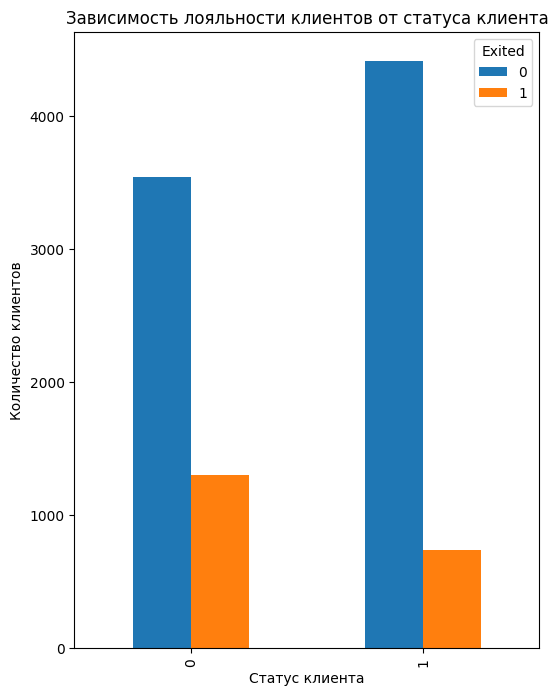

In [43]:
pivot_2 = churn_data.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)

fig_8, axes_8 = plt.subplots(figsize=(6,8))
pivot_2.plot(
    kind='bar',
    ax=axes_8
)
axes_8.set_title('Зависимость лояльности клиентов от статуса клиента')
axes_8.set_xlabel('Статус клиента')
axes_8.set_ylabel('Количество клиентов')
print(pivot_2)

 Статус активного клиента положительно влияет на лояльность клиента. Количестово ушедших клиентов с активным статусом практически в два раза меньше чем с неактивным. Не очень понятно из условия задачи что такое активный статус, но банку следует больше клиентов переводить в этот статус. 

Задача 9.9 В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [44]:
import plotly.express as px
pivot = churn_data.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc= 'mean',
)
print(pivot)

fig = px.choropleth(
    data_frame=pivot, 
    locations=pivot.index, 
    locationmode = "country names", 
    color= 'Exited', 
    range_color=[0, 0.5], 
    title='Распределение ушедших клиентов по странам', 
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

             Exited
Geography          
France     0.161548
Germany    0.324432
Spain      0.166734


График показывает явное превышение оттока клиентов из Германии в сравнении с другими странами. 
Можно предположить, что стандарты обслуживания в этом банке(банк явно международный) ниже чем в немецких банках.

Задача 9.10 Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [45]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
print(churn_data['CreditScoreCat'])

0            Fair
1            Fair
2            Poor
3            Good
4       Excellent
          ...    
9995         Good
9996         Poor
9997         Good
9998         Good
9999    Excellent
Name: CreditScoreCat, Length: 10000, dtype: object


Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [53]:
pivot_3 = churn_data.pivot_table(
    values='Exited',
    index= 'CreditScoreCat',
    columns = 'Tenure',
    aggfunc= 'mean',
)
print(pivot_3)

pivot_4 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc= 'mean',   
)
#pivot.columns = pivot_4.columns.astype('string')
display(pivot_4)


Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333  \
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 

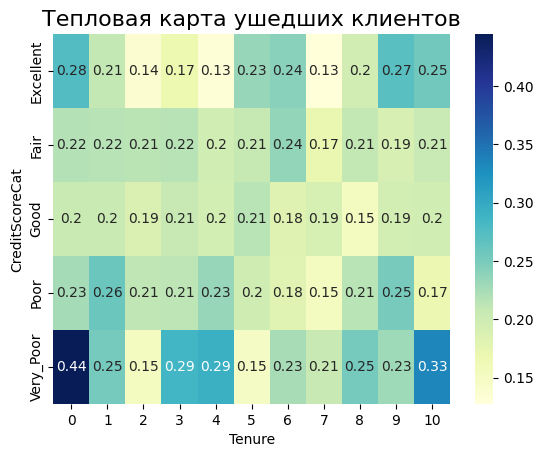

In [56]:
heatmap = sns.heatmap(data=pivot_4, annot = True, cmap='YlGnBu',)
heatmap.set_title('Тепловая карта ушедших клиентов', fontsize=16);

Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Тепловая карта показывает. С одной стороны уходят клиенты с низким кредитным рейтингом и малоактивные по использованию банковских продуктов. И по этому поводу банку не следует особо беспокоиться. С другой стороны много ушедших клиентов с высоким рейтингом и большим количеством используемых продуктов. Это плохой признак и его следует тщательнее исследовать.